In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!unzip -q '/content/drive/My Drive/CrossSell/train.csv_VsW9EGx.zip'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
 
path='/content/train.csv'
tr_data=pd.read_csv(path)

In [ ]:
tr_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
tr_data.shape

(381109, 12)

In [ ]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
tr_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
class Preprocessing:
     def __init__(self):
         pass
     def convertToCategory(self,df):
        cols=df.select_dtypes(['object']).columns
        for col in cols:
           df[col]=df[col].astype('category')
        return df
     def imputeMissingValues(self,df,cols):
         for col in cols:
            df[col]=df[col].fillna(df[col].mode()[0])
    
         return df
     def knnImpute(self, df, cols):
         df[cols]=df[cols].fillna(np.nan)
         KNN(k=10).fit_transform(df[cols])
         return df
     def num_cols(self,df):
        numCols=df.select_dtypes (['int64','float64']).columns
        return numCols
     def get_cat_cols(self,df):
        catCols=df.select_dtypes(['category']).columns
        return catCols
     def convert_num_to_cat(self,df, numCols):
        #numCols=list(self.num_cols(df))
        
        #numCols=list(set(numCols)-set(['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit','patientid','case_id']))
        print(numCols)
        print(len(df))
        for col in numCols:
           print(col, ':',df[col].nunique())
           for col in numCols:
              df[col]=df[col].astype('category')
        return df
     def split_ds(self, features,target):
        ''' Split the dataset into train and test'''
        return train_test_split(features,target,test_size=.3,random_state=42)

In [6]:
pp=Preprocessing ()

In [7]:
data_tr=pp.convertToCategory(tr_data)

In [8]:
tr_data.Policy_Sales_Channel.value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [ ]:
from fancyimpute import KNN

In [187]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int64   
 1   Gender                381109 non-null  category
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  int64   
 4   Region_Code           381109 non-null  float64 
 5   Previously_Insured    381109 non-null  int64   
 6   Vehicle_Age           381109 non-null  category
 7   Vehicle_Damage        381109 non-null  category
 8   Annual_Premium        381109 non-null  float64 
 9   Policy_Sales_Channel  381109 non-null  float64 
 10  Vintage               381109 non-null  int64   
 11  Response              381109 non-null  int64   
dtypes: category(3), float64(3), int64(6)
memory usage: 27.3 MB


In [ ]:
tr_data.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [9]:
numCols=list(pp.num_cols(tr_data))
numCols.remove('id')
numCols

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [10]:
for col in numCols:
    print(col,tr_data[col].nunique())
    print(tr_data[col].unique())

Age 66
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License 2
[1 0]
Region_Code 53
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured 2
[0 1]
Annual_Premium 48838
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel 155
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129

Columns such as Response,Region_Code,Driving_License,Previously_Insured, and Policy_Sales_Channel are converted into category type as most of them have binary values or logically non numeric data.

In [11]:
toBeConverted=['Driving_License','Region_Code','Previously_Insured','Policy_Sales_Channel','Response']

In [12]:
 tr_data_pp=pp.convert_num_to_cat(tr_data,toBeConverted)

['Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Response']
381109
Driving_License : 2
Region_Code : 53
Previously_Insured : 2
Policy_Sales_Channel : 155
Response : 2


In [13]:
 tr_data_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int64   
 1   Gender                381109 non-null  category
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  category
 4   Region_Code           381109 non-null  category
 5   Previously_Insured    381109 non-null  category
 6   Vehicle_Age           381109 non-null  category
 7   Vehicle_Damage        381109 non-null  category
 8   Annual_Premium        381109 non-null  float64 
 9   Policy_Sales_Channel  381109 non-null  category
 10  Vintage               381109 non-null  int64   
 11  Response              381109 non-null  category
dtypes: category(8), float64(1), int64(3)
memory usage: 14.9 MB


In [14]:
numCols_n=list(pp.num_cols(tr_data_pp))
numCols_n.remove('id')
numCols_n

['Age', 'Annual_Premium', 'Vintage']

In [15]:
catCols_n=list(pp.get_cat_cols(tr_data_pp))
catCols_n.remove('Response')
catCols_n

['Gender',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel']

In [16]:
target='Response'

In [17]:
class Visualizations:
    def __init__(self):
       pass
    def visualize_uni(self,df,catCols):
       for col in catCols:
         plt.figure()
         df[col].value_counts().plot(kind='bar')
         plt.xlabel(col)
         plt.ylabel('counts')
         plt.show()
    def visualize_bi(self, df,features, target):
       for fea in features:
         plt.figure(figsize=(15,12))
         sns.boxplot(x=df[target], y=df[fea])
         plt.xlabel(target)
         plt.ylabel(fea)
         plt.show()
    def visualize_cat_dist(self, df, numCols,catCols,target):
        for col in numCols[0:3]:
           for c in catCols[0:3]:
              plt.figure(figsize=(15,12))
              sns.barplot(x=c, y=col, hue=target, data=df)
              plt.show()

In [ ]:
viz=Visualizations()

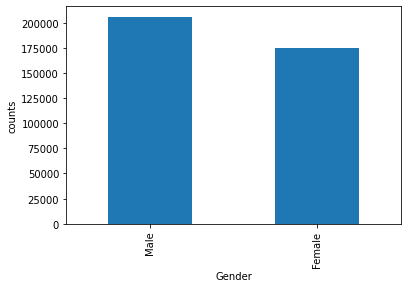

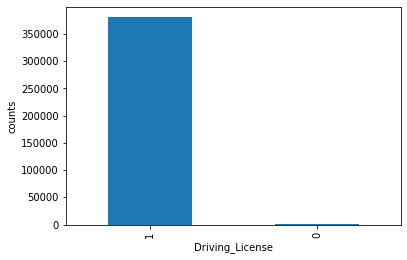

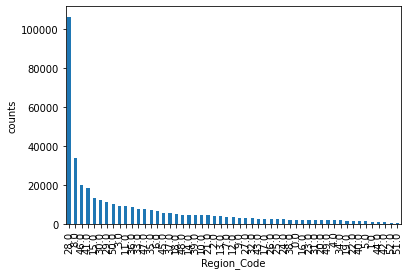

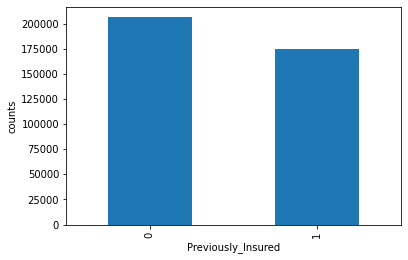

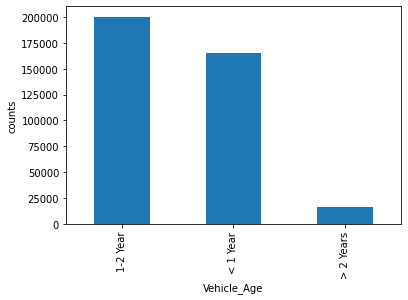

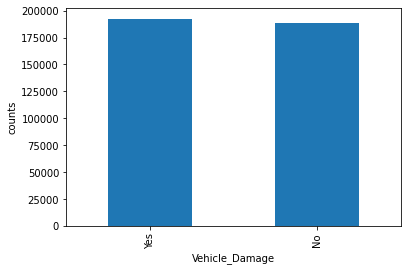

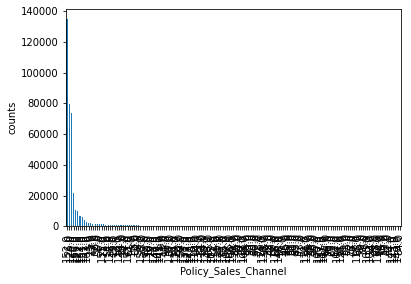

In [ ]:
viz.visualize_uni(tr_data_pp,catCols_n)

1.There are more records for people with driving license.
 
2.People whose vehicle age is more than 2 yrs they have fewer records.
 
3.Records for a particular region code and policy channel dominates.

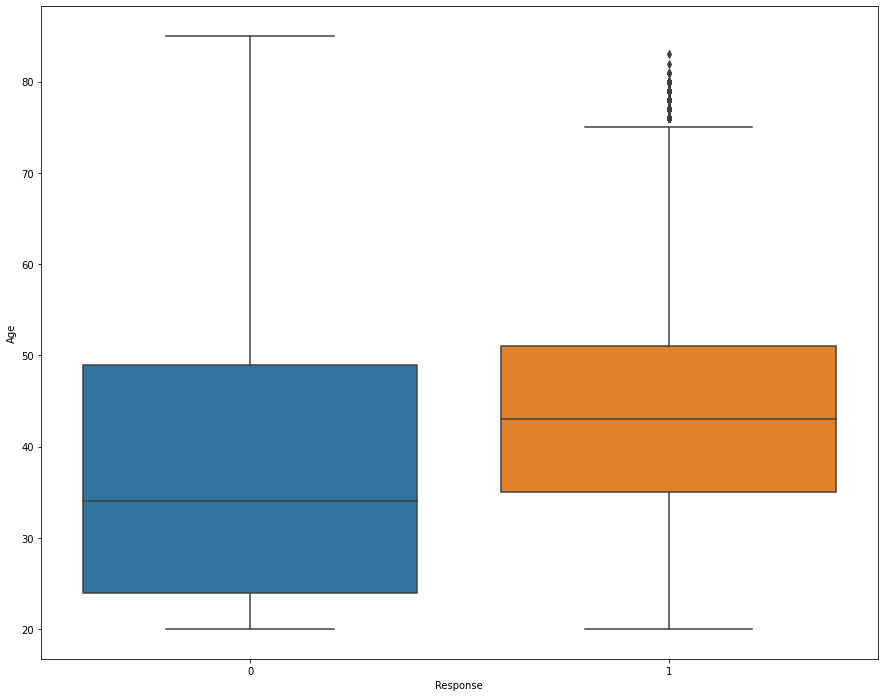

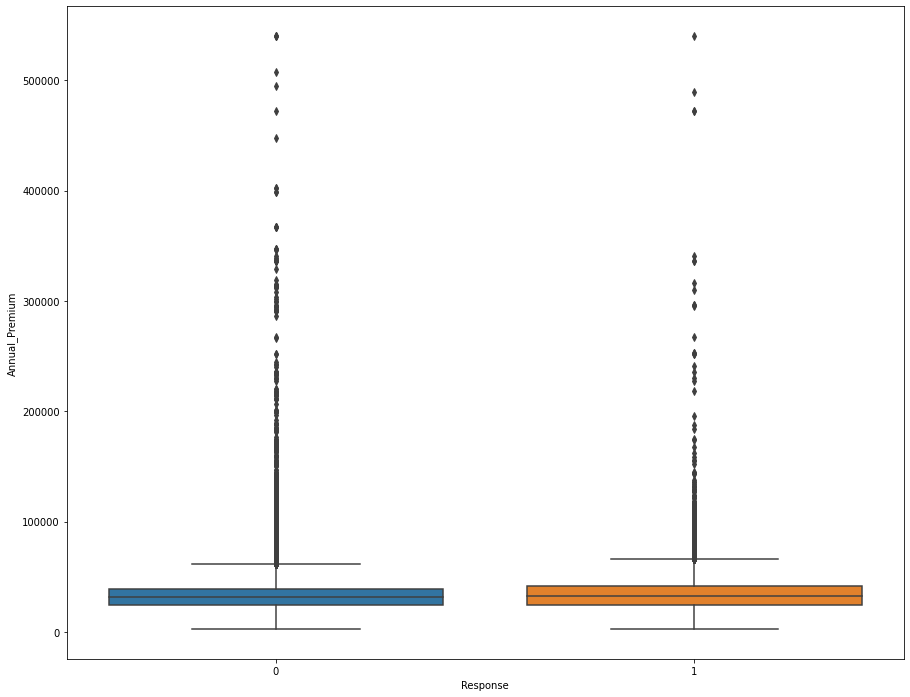

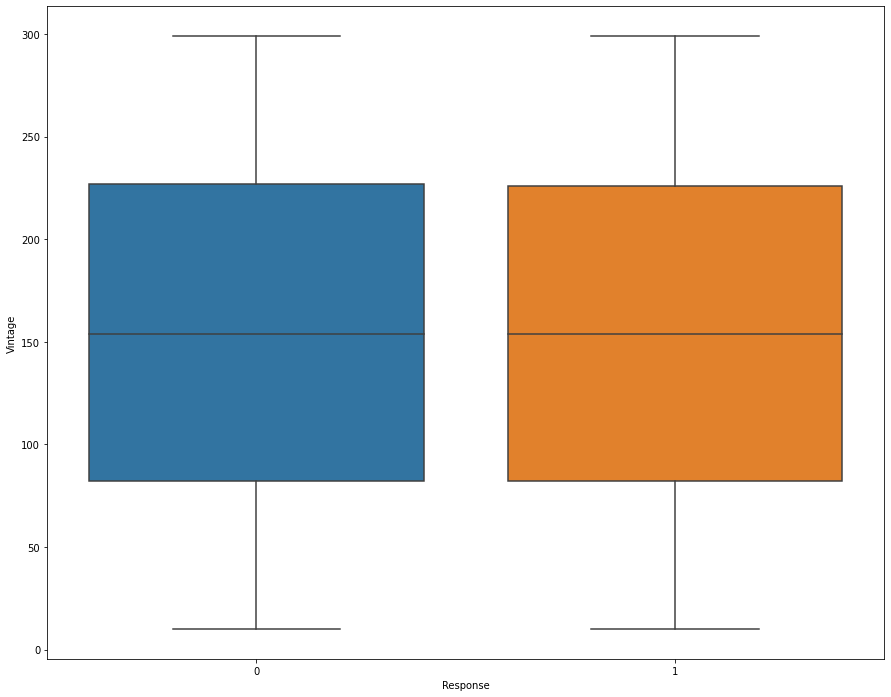

In [ ]:
#bivariate visualization
viz.visualize_bi(tr_data_pp,numCols_n, target)

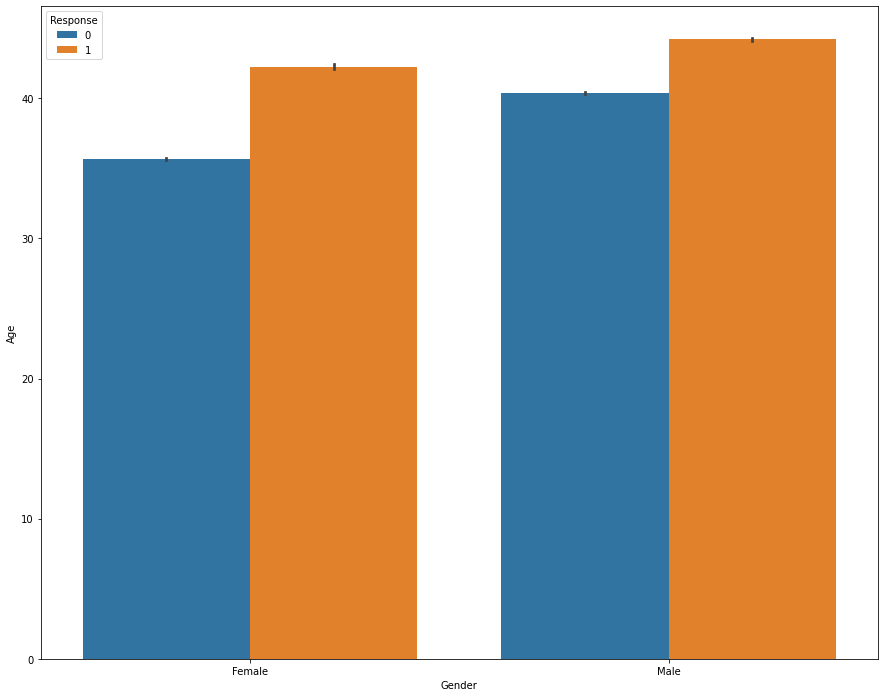

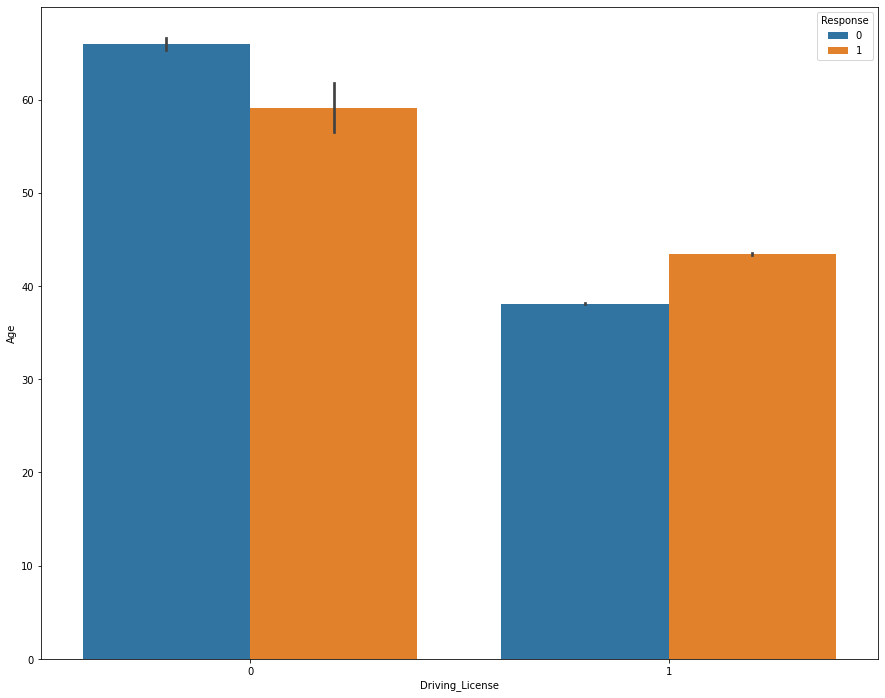

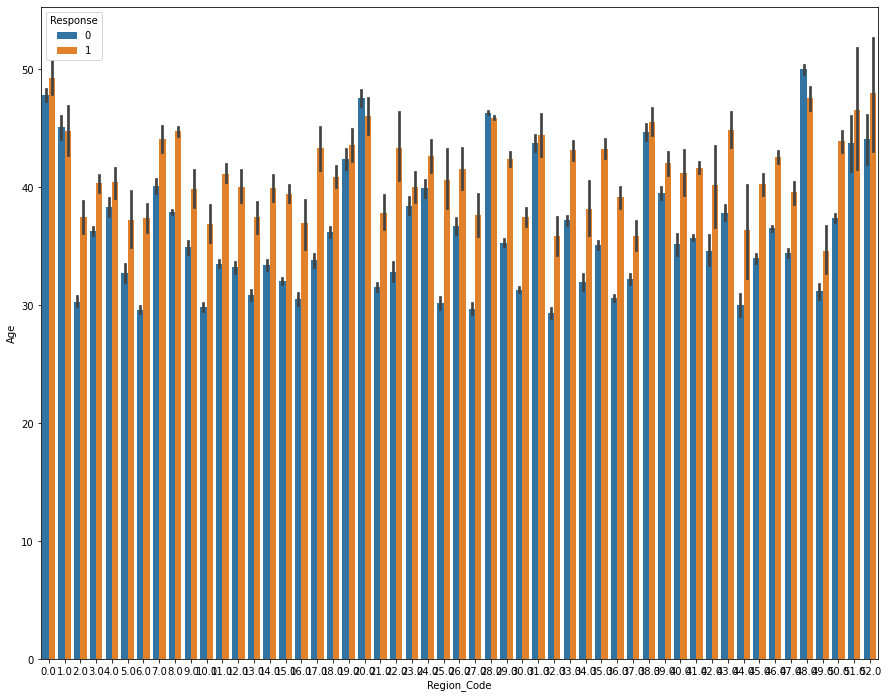

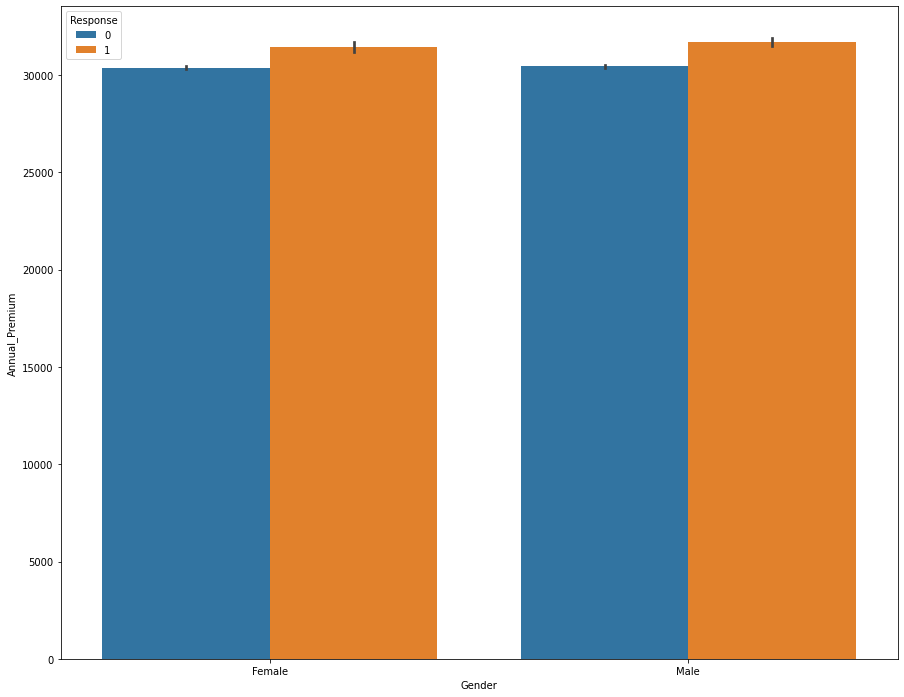

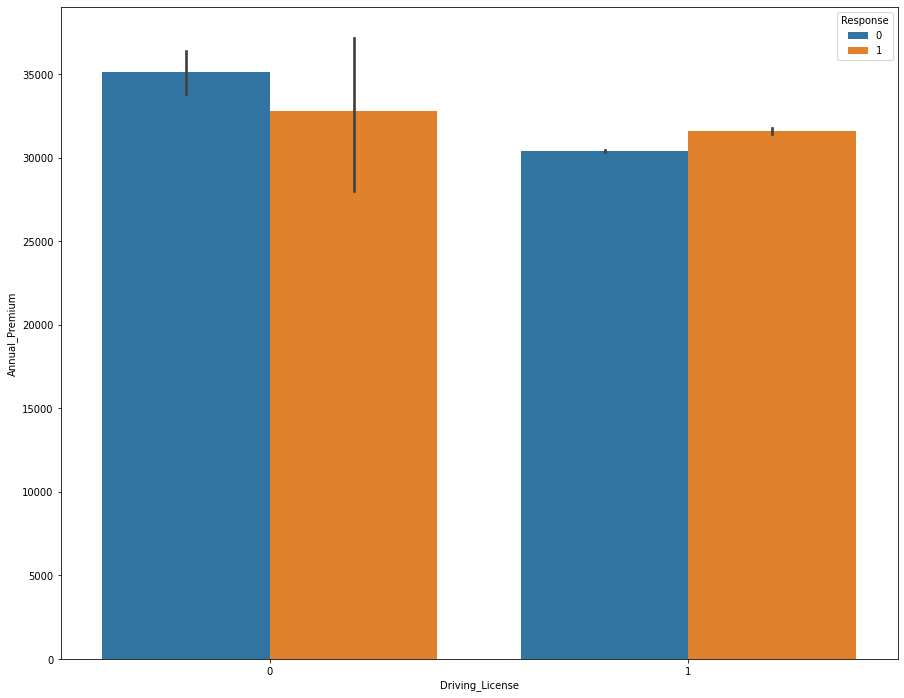

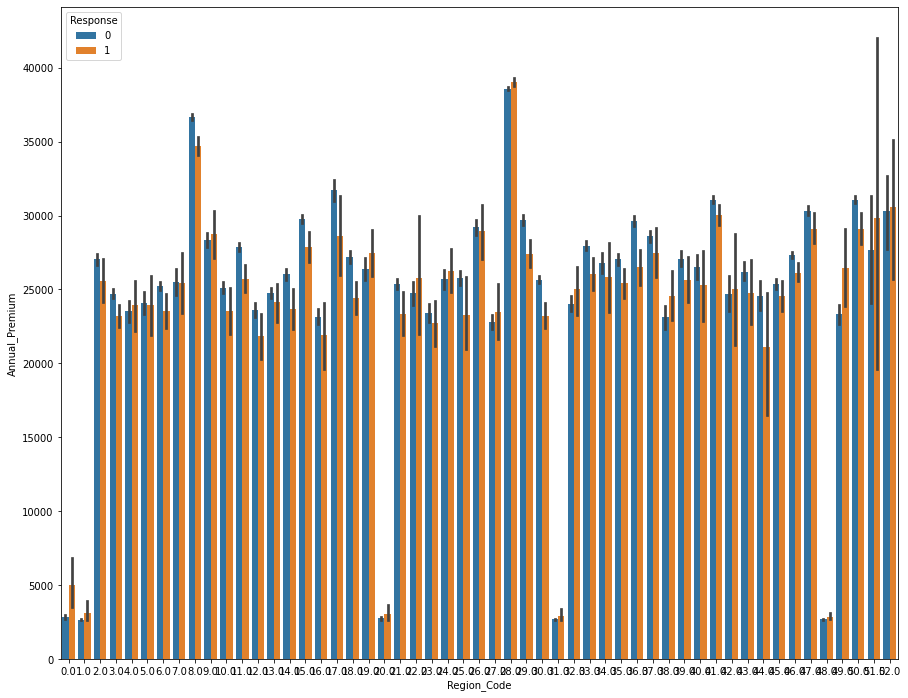

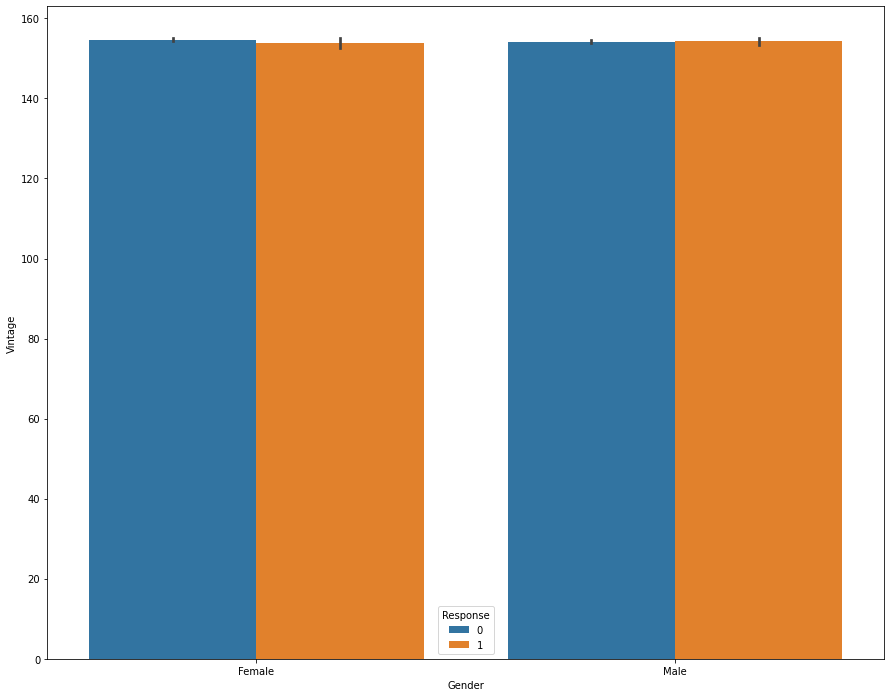

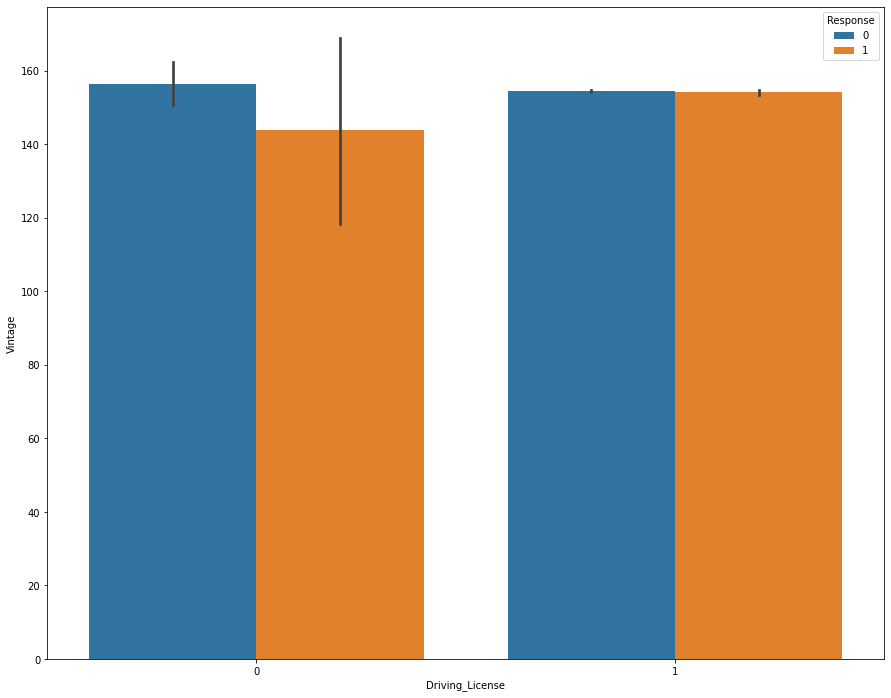

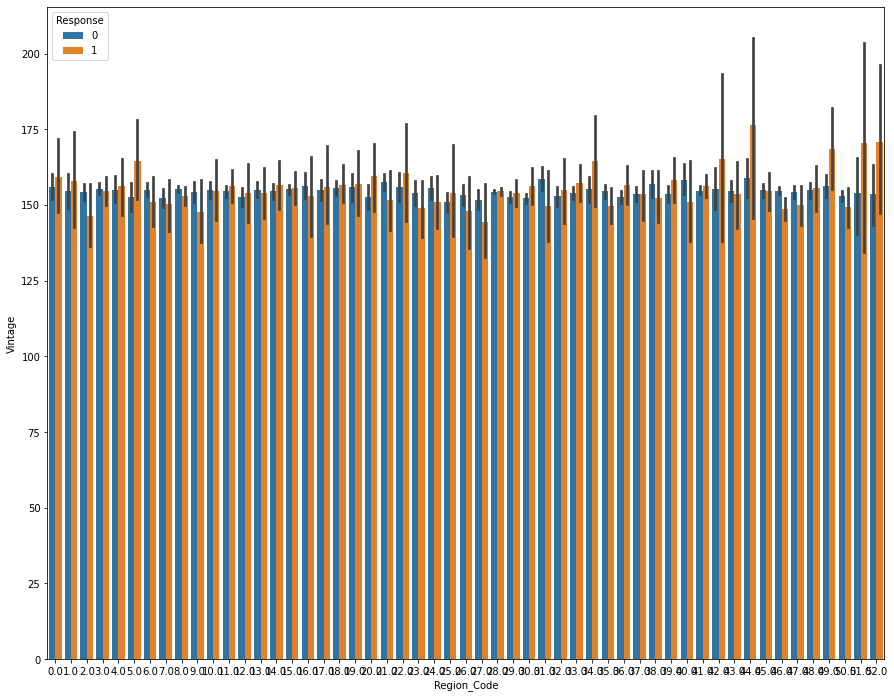

In [ ]:
viz.visualize_cat_dist(tr_data_pp,numCols_n,catCols_n,target)

In [18]:
class FE:
    def __init__(self):
       pass
    def create_bins(self,n, numCols, df):
       for col in numCols[0:len(numCols)]:
           bins=np.linspace(df[col].min(),df[col].max(),n)
           df[col+'Bin']= pd.cut(df[col],bins, include_lowest=False)
       return df
    def create_pct_grp(self,df,catCols):
         for col in catCols[0:len(catCols)]:
             df[col+'Pct']=100*df[col].groupby(df[col]).transform('count')/len(df[col])
         return df

In [19]:
fe=FE()

In [20]:
tr_data_fe=fe.create_bins(5,numCols_n,tr_data_pp)

In [21]:
tr_data_fe=fe.create_pct_grp(tr_data_fe, catCols_n)

In [22]:
tr_data_fe.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'AgeBin',
       'Annual_PremiumBin', 'VintageBin', 'GenderPct', 'Driving_LicensePct',
       'Region_CodePct', 'Previously_InsuredPct', 'Vehicle_AgePct',
       'Vehicle_DamagePct', 'Policy_Sales_ChannelPct'],
      dtype='object')

In [23]:
tr_data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       381109 non-null  int64   
 1   Gender                   381109 non-null  category
 2   Age                      381109 non-null  int64   
 3   Driving_License          381109 non-null  category
 4   Region_Code              381109 non-null  category
 5   Previously_Insured       381109 non-null  category
 6   Vehicle_Age              381109 non-null  category
 7   Vehicle_Damage           381109 non-null  category
 8   Annual_Premium           381109 non-null  float64 
 9   Policy_Sales_Channel     381109 non-null  category
 10  Vintage                  381109 non-null  int64   
 11  Response                 381109 non-null  category
 12  AgeBin                   374877 non-null  category
 13  Annual_PremiumBin        316232 non-null  ca

In [24]:
num_cols_fe=list(pp.num_cols(tr_data_fe))
num_cols_fe=list(set(num_cols_fe)-set(['id']))
num_cols_fe

['Policy_Sales_ChannelPct',
 'Vehicle_AgePct',
 'Previously_InsuredPct',
 'Annual_Premium',
 'Driving_LicensePct',
 'Age',
 'GenderPct',
 'Region_CodePct',
 'Vintage',
 'Vehicle_DamagePct']

In [25]:
cat_cols_fe=list(pp.get_cat_cols(tr_data_fe))
cat_cols_fe.remove('Response')
cat_cols_fe

['Gender',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'AgeBin',
 'Annual_PremiumBin',
 'VintageBin']

In [27]:
from sklearn.preprocessing import LabelEncoder

In [26]:
class Encoding:
   def __init__(self):
       self.le=LabelEncoder()
   def one_hot_encode(self, df, catCols):
       ''' encode the categorical variables by 
           One hot encoding'''
       df1=df.copy()
       Ohe_sub=pd.get_dummies(df1[catCols])
       df1.drop(columns=catCols,inplace=True)
       df1=pd.concat([df1,Ohe_sub], axis=1)
       return df1
   def lbl_encode(self,df,target):
       #le=LabelEncoder()
       df[target]=self.le.fit_transform(df[target])
       return df
   def lbl_decode(self,y_pred):
      return self.le.inverse_transform(y_pred)

In [28]:
# one-hot-encode the categorical variables
enc=Encoding()

In [29]:
tr_data_enc=enc.one_hot_encode(tr_data_fe,cat_cols_fe)

In [30]:
 len(tr_data_enc.columns)

243

In [ ]:
#tr_data_enc=enc.lbl_encode(tr_data_enc,target)

In [87]:
 tr_data_enc[target]

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: category
Categories (2, int64): [0, 1]

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [32]:
 
class pca:
    def __init__(self):
           pass
    def performPCA(self,data, categoricalCols):
        try:
            #targetDF = data[[response]]
            #uniqueTarget = targetDF[response].unique()
            # d1 = data.drop(categoricalCols, axis=1)
            #d1 = data.drop(response, axis=1)
            #d1 = pd.get_dummies(d1)
            # d1=data
            scaledData = self.scaleData(data)
            
            pca = PCA(n_components=2)  # n_components=10
            
            pcaModel = pca.fit(scaledData)
            pcaTransformed = pcaModel.transform(scaledData)
            
            print(pcaTransformed.shape)
            #comp = pd.DataFrame(pcaModel.components_, columns=data.columns)
            #print(comp)   
            return pcaTransformed
            #pcaTransformedResponse = pd.concat([pcaTransformed, targetDF], axis=1)
            #return pcaTransformedResponse
 
           
        except Exception as exp:
           
            print(exp)
 
    def scaleData(self, data):
        try:
            scaler = MinMaxScaler()
            d2 = scaler.fit_transform(data)
            scaledData = pd.DataFrame(d2, columns=data.columns)
            return scaledData
        except Exception as exp:
            
            print(exp)

In [33]:
pca_ob=pca()
fea=tr_data_enc.drop(target,axis=1)
pca_data=pca_ob.performPCA( fea,cat_cols_fe)

(381109, 2)


In [34]:
#splitting pca data into train and test
 
tar=tr_data_enc[target]
x_train,x_test,y_train,y_test=pp.split_ds(pca_data,tar)

In [91]:
#split the  fe dataset
features=tr_data_enc.drop(columns=['id','Response'])
tar=tr_data_enc[target]
#tr_data_enc.columns

In [92]:
x_train,x_test,y_train,y_test=pp.split_ds(features,tar)

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
class Scaling:
   def __init__(self):
        pass
   def scale(self, df):
     sc=StandardScaler()
     X=sc.fit_transform(df)
     return X

In [99]:
sc=Scaling()

In [100]:
x_train=sc.scale(x_train)
x_test=sc.scale(x_test)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [36]:
class Model:
   def __init__(self):
     pass
   def tune_params(self, params, model, x,y):
       gs=GridSearchCV(estimator=model, param_grid=params,cv=5,verbose=10,scoring='roc_auc')
       gs_res=gs.fit(x,y)
       print(gs_res.best_params_)
       return gs_res.best_estimator_
   def predict(self,model, x_test):
      y_pred=model.predict(x_test)
      return y_pred
   def score(self, y_true,y_pred):
      acc=roc_auc_score(y_true,y_pred)
      return acc

In [37]:
 m=Model()

In [80]:
#training Logistics Regression
lr=LogisticRegression(solver='liblinear',penalty='l1')
solvers=['newton-cg', 'lbfgs', 'liblinear']
penalty=['None','l1','l2']
C=[ 1.0, 0.1, 0.01]
grid_lr={'C':C}
#'solver':solvers,'penalty':penalty,'C':C}

In [ ]:
lr_best=m.tune_params(grid_lr,lr,x_train,y_train)

In [ ]:
 #predict 
y_pred_lr=m.predict(lr_best, x_test)

In [ ]:
 # Accuracy on validation set
lr_val_acc=m.score(y_test,y_pred_lr)
lr_val_acc

0.5

In [38]:
# random forest classifier
rf=RandomForestClassifier(n_estimators=150,max_features=.5, min_samples_split=6)
n_estimators=[50,100,150]
criterion=['gini','entropy']
max_features=['sqrt',.25,.5]
min_samples_split=[2,4,6]
 
#grid={'n_estimators':n_estimators}
grid_rf={'criterion':criterion}
#grid={'max_features':max_features}
#grid={'min_samples_split':min_samples_split}

In [39]:
 m_best=m.tune_params(grid_rf,rf,x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... criterion=gini, score=0.817, total= 1.2min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.821, total= 1.2min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.821, total= 1.3min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.8min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.820, total= 1.2min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.0min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.818, total= 1.2min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.2min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.816, total= 2.0min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.2min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.822, total= 1.9min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 10.1min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.821, total= 2.0min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.1min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.819, total= 2.0min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 14.1min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.818, total= 2.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.1min finished


{'criterion': 'gini'}


In [ ]:
m_best.get_params()

In [40]:
#predict 
y_pred=m.predict(m_best, x_test)

In [41]:
# Evaluation on validation set
val_acc=m.score(y_test,y_pred)
val_acc

0.5575591894151292

In [42]:
import pickle

In [43]:
fname='rf.sav'
pickle.dump(m_best, open(fname,'wb'))

In [102]:
#Tune xgboost parameters
xgb=XGBClassifier(n_estimators=200,learning_rate=.01, n_jobs=-1, max_depth=4,min_child_weight=6,gamma=0.2, subsample=1, colsample_bytree=1)
max_depth=[4,5,6]
min_child_weight=[4,5,6]
gamma=[0,.1,.2,.3,.4] 
subsample=[.6,.7,.8,.9,1]
colsample_bytree=[.6,.7,.8,.9,1]
reg_alpha=[1e-5, 1e-2, 0.1, 1]
#grid={'max_depth':max_depth}
#grid={'min_child_weight':min_child_weight}
#grid={'gamma':gamma}
#grid={'subsample':subsample}
#grid={'colsample_bytree':colsample_bytree}
grid_xgb={'reg_alpha':reg_alpha}

In [ ]:
xgb_best=m.tune_params(grid_xgb,xgb, x_train,y_train)

In [ ]:
xgb_best.get_params()

In [ ]:
y_pred_xgb=m.predict(xgb_best,x_test)

In [ ]:
 # Evaluation on validation set
val_acc_xgb=m.score(y_test,y_pred_xgb)
val_acc_xgb

0.5

Now we will run the same algorithms on the dataset without pca and see the performance.

In [82]:
 #training Logistics Regression
 
lr_best=m.tune_params(grid_lr,lr,x_train,y_train)
 
#predict 
y_pred_lr=m.predict(lr_best, x_test)
 
# Accuracy on validation set
lr_val_acc=m.score(y_test,y_pred_lr)
print(lr_val_acc)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=1.0, score=0.847, total=   5.5s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV] ............................... C=1.0, score=0.849, total=   7.5s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.0s remaining:    0.0s


[CV] ............................... C=1.0, score=0.852, total=   7.6s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.6s remaining:    0.0s


[CV] ............................... C=1.0, score=0.851, total=  19.1s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   39.7s remaining:    0.0s


[CV] ............................... C=1.0, score=0.849, total=  28.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s


[CV] ............................... C=0.1, score=0.847, total=   3.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV] ............................... C=0.1, score=0.849, total=  11.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV] ............................... C=0.1, score=0.852, total=  23.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.8min remaining:    0.0s


[CV] ............................... C=0.1, score=0.850, total=   2.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


[CV] ............................... C=0.1, score=0.849, total=   4.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.844, total=   3.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.846, total=   5.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.849, total=   5.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.847, total=   9.3s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.846, total=   4.0s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.3min finished


{'C': 1.0}
0.5001165113796945


In [ ]:
#RF
m_best=m.tune_params(grid_rf,rf,x_train,y_train)
 
 
#predict 
y_pred_rf=m.predict(m_best, x_test)
 
# Evaluation on validation set
val_acc=m.score(y_test,y_pred_rf)
print (val_acc)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... criterion=gini, score=0.834, total= 6.5min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.839, total= 6.3min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 12.7min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.839, total= 6.3min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 19.0min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.838, total= 5.8min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 24.9min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.838, total= 6.1min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 31.0min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.835, total= 6.1min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 37.1min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.840, total= 5.8min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 42.9min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.841, total= 6.1min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 49.0min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.838, total= 5.8min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 54.7min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.839, total= 6.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 60.7min finished


{'criterion': 'entropy'}
0.540446145224056


In [79]:
fname='rf_b.sav'
pickle.dump(m_best, open(fname,'wb'))

In [103]:
#xgboost
 
xgb_best=m.tune_params(grid_xgb,xgb, x_train,y_train)
 
y_pred_xgb=m.predict(xgb_best,x_test)
 
# Evaluation on validation set
val_acc_xgb=m.score(y_test,y_pred_xgb)
print(val_acc_xgb)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... reg_alpha=1e-05, score=0.843, total= 3.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.8min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.846, total= 3.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.6min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.847, total= 3.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.4min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.846, total= 3.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 15.1min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.846, total= 3.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.9min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.843, total= 3.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 22.7min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.846, total= 3.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 26.4min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.847, total= 3.7min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 30.2min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.846, total= 3.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 34.0min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.846, total= 3.8min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.843, total= 3.8min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.846, total= 3.8min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.847, total= 3.7min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.846, total= 3.9min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.846, total= 3.9min
[CV] reg_alpha=1 .....................................................
[CV] ......................... reg_alpha=1, score=0.843, total= 4.0min
[CV] reg_alpha=1 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 76.7min finished


{'reg_alpha': 0.1}
0.5


In [104]:
fname2='xgb_2.sav'
pickle.dump(xgb_best, open(fname2,'wb'))

In [44]:
!unzip -q '/content/drive/My Drive/CrossSell/test.csv_yAFwdy2.zip'

In [45]:
test_path='/content/test.csv'

In [46]:
tst_data=pd.read_csv(test_path)

In [136]:
tst_data.shape

(127037, 11)

In [109]:
tst_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [47]:
 data_tst=pp.convertToCategory(tst_data)

In [139]:
data_tst.shape

(127037, 11)

In [141]:
data_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    127037 non-null  int64   
 1   Gender                127037 non-null  category
 2   Age                   127037 non-null  int64   
 3   Driving_License       127037 non-null  int64   
 4   Region_Code           127037 non-null  float64 
 5   Previously_Insured    127037 non-null  int64   
 6   Vehicle_Age           127037 non-null  category
 7   Vehicle_Damage        127037 non-null  category
 8   Annual_Premium        127037 non-null  float64 
 9   Policy_Sales_Channel  127037 non-null  float64 
 10  Vintage               127037 non-null  int64   
dtypes: category(3), float64(3), int64(5)
memory usage: 8.1 MB


In [48]:
 toBeConverted_t=['Driving_License','Region_Code','Previously_Insured','Policy_Sales_Channel']

In [49]:
 tst_data_cl=pp.convert_num_to_cat(data_tst,toBeConverted_t)

['Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel']
127037
Driving_License : 2
Region_Code : 53
Previously_Insured : 2
Policy_Sales_Channel : 145


In [144]:
tst_data_cl.shape

(127037, 11)

In [50]:
numCols_tst=list(pp.num_cols(tst_data_cl))
numCols_tst.remove('id')
#numCols_tst.remove('patientid')
numCols_tst

['Age', 'Annual_Premium', 'Vintage']

In [51]:
catCols_tst=list(pp.get_cat_cols(tst_data_cl))
#catCols_tst.remove('Response')
catCols_tst

['Gender',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel']

In [52]:
 tst_data_fe=fe.create_bins(5,numCols_tst,tst_data_cl)

In [148]:
tst_data_fe.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'AgeBin', 'Annual_PremiumBin',
       'VintageBin'],
      dtype='object')

In [149]:
tst_data_fe.shape

(127037, 14)

In [53]:
tst_data_fe=fe.create_pct_grp(tst_data_fe, catCols_tst)

In [151]:
tst_data_fe.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'AgeBin', 'Annual_PremiumBin',
       'VintageBin', 'GenderPct', 'Driving_LicensePct', 'Region_CodePct',
       'Previously_InsuredPct', 'Vehicle_AgePct', 'Vehicle_DamagePct',
       'Policy_Sales_ChannelPct'],
      dtype='object')

In [54]:
tst_data_fe.shape

(127037, 21)

In [55]:
num_cols_new_tst=list(pp.num_cols(tst_data_fe))
num_cols_new_tst=list(set(num_cols_new_tst)-set(['id']))
num_cols_new_tst

['Policy_Sales_ChannelPct',
 'Vehicle_AgePct',
 'Previously_InsuredPct',
 'Annual_Premium',
 'Driving_LicensePct',
 'Age',
 'GenderPct',
 'Region_CodePct',
 'Vintage',
 'Vehicle_DamagePct']

In [56]:
cat_cols_new_tst=list(pp.get_cat_cols(tst_data_fe))
#cat_cols_new.remove('Stay')
cat_cols_new_tst

['Gender',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'AgeBin',
 'Annual_PremiumBin',
 'VintageBin']

In [57]:
tst_data_enc=enc.one_hot_encode(tst_data_fe,cat_cols_new_tst)

In [58]:
tst_data_enc.shape

(127037, 232)

In [59]:
 #split the dataset
features_tst=tst_data_enc.drop(columns=['id'])
#tar_tst=tr_data_enc[target]

In [60]:
pca_ob=pca()
 
pca_data_tst=pca_ob.performPCA( features_tst,cat_cols_new_tst)

(127037, 2)


In [ ]:
x_test_tst=sc.scale(features_tst)
x_test_tst

In [62]:
y_pred_tst=m.predict(m_best,pca_data_tst)

In [65]:
Response=pd.DataFrame(y_pred_tst, columns=['Response'])

In [66]:
Response.head()

,Response
0,0
1,0
2,0
3,0
4,0


In [67]:
final_res=pd.concat([tst_data['id'],Response],axis=1)

In [69]:
final_res.Response.value_counts()

0    121691
1      5346
Name: Response, dtype: int64

In [68]:
final_res.to_csv('submission.csv', index=False)